[View in Colaboratory](https://colab.research.google.com/github/sumeshsharma1/cbeh193honors/blob/master/Validation_for_Benchmarking%2C_Zebrafish.ipynb)

(10001,)
float32
(10, 10001, 5000)
(10001,)
(10001,)


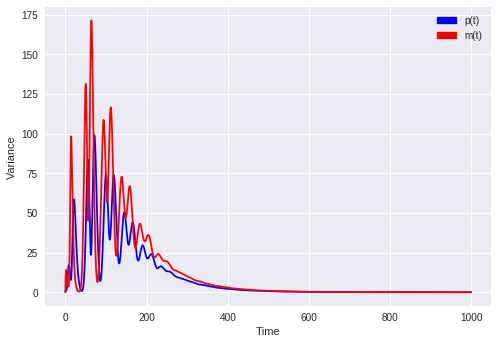

In [1]:
# For Zebrafish Case Study
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
n_simulations = 5000;
a = .225; m = 33; b = 0.23; c = 0.23; p= 10; 
tstep = .1;
t = np.linspace(0, 1000, num=10001)
print(np.shape(t))
steps = len(t)
x = np.zeros((10,steps,n_simulations),dtype=np.float32)
xp = np.zeros((10,steps,n_simulations),dtype=np.float32)
print(x.dtype)
print(np.shape(x))
std = np.array([.28,1.2])
mean = np.array([2.8,12])

for i in range(n_simulations):
  x[:,1,i] = 10,1,0,0,0,0,0,0,0,0
  xp[:,1,i] = x[:,1,i]
  R = []
  R = np.random.randn(1,2);
  random_par = np.multiply(std,R) + mean
  tau1 = random_par[0,0]
  tau2 = random_par[0,1]
  for k in range(2,steps):
    xp[0,k,i] = xp[0,k-1,i] + tstep*(a*x[9,k-1,i] - b*x[0,k-1,i]) + abs((np.sqrt(tstep*abs(a*x[9,k-1,i]))) - np.sqrt(tstep*abs(b*x[0,k-1,i])))*np.random.randn(1)
    xp[1,k,i] = xp[1,k-1,i] + tstep*((m/(1 + ((x[5,k-1,i])**2)/(p**2))) - c*x[1,k-1,i]) + abs((np.sqrt(tstep*abs((m/(1 + ((x[5,k-1,i])**2)/(p**2)))))) - np.sqrt(tstep*abs(c*x[1,k-1,i])))*np.random.randn(1)
    xp[2,k,i] = xp[2,k-1,i] + tstep*((4/tau2)*(x[0,k-1,i] - x[2,k-1,i]))
    xp[3,k,i] = xp[3,k-1,i] + tstep*((4/tau2)*(x[2,k-1,i] - x[3,k-1,i]))
    xp[4,k,i] = xp[4,k-1,i] + tstep*((4/tau2)*(x[3,k-1,i] - x[4,k-1,i]))
    xp[5,k,i] = xp[5,k-1,i] + tstep*((4/tau2)*(x[4,k-1,i] - x[5,k-1,i]))
    xp[6,k,i] = xp[6,k-1,i] + tstep*((4/tau1)*(x[1,k-1,i] - x[6,k-1,i]))
    xp[7,k,i] = xp[7,k-1,i] + tstep*((4/tau1)*(x[6,k-1,i] - x[7,k-1,i]))
    xp[8,k,i] = xp[8,k-1,i] + tstep*((4/tau1)*(x[7,k-1,i] - x[8,k-1,i]))
    xp[9,k,i] = xp[9,k-1,i] + tstep*((4/tau1)*(x[8,k-1,i] - x[9,k-1,i]))
    x[:,k,i] = xp[:,k,i]
x1sim = np.squeeze(xp[0,:,:])
x2sim = np.squeeze(xp[1,:,:])

mu1 = np.mean(x1sim, axis=1)
mu2 = np.mean(x2sim, axis=1)
var1 = np.var(x1sim, axis=1)
var2 = np.var(x2sim, axis=1)
print(mu1.shape)
np.savetxt('mu1.txt',mu1)
np.savetxt('mu2.txt',mu2)
np.savetxt('var1.txt',var1)
np.savetxt('var2.txt',var2)

print(var1.shape)

plt.plot(t,var1,'b-',t,var2,'r-')
plt.xlabel('Time')
plt.ylabel('Variance')

red_line = mpatches.Patch(color ='red', label = 'm(t)')
blue_line = mpatches.Patch(color ='blue', label ='p(t)')
plt.legend(handles=[blue_line, red_line])

plt.show()
  


In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Create & upload a file.
uploaded1 = drive.CreateFile({'var1raw': 'var1.txt'})
uploaded1.SetContentFile('var1.txt')
uploaded1.Upload()
print('Uploaded file with ID {}'.format(uploaded1.get('id')))

uploaded2 = drive.CreateFile({'var2raw': 'var2.txt'})
uploaded2.SetContentFile('var2.txt')
uploaded2.Upload()
print('Uploaded file with ID {}'.format(uploaded2.get('id')))

uploaded3 = drive.CreateFile({'mu1raw': 'mu1.txt'})
uploaded3.SetContentFile('mu1.txt')
uploaded3.Upload()
print('Uploaded file with ID {}'.format(uploaded3.get('id')))

uploaded4 = drive.CreateFile({'mu2raw': 'mu2.txt'})
uploaded4.SetContentFile('mu2.txt')
uploaded4.Upload()
print('Uploaded file with ID {}'.format(uploaded4.get('id')))

Uploaded file with ID 1tBgzniZ0R5drxZWJ_C08N9KZJF7sfjXK
Uploaded file with ID 1xb7HexQ7DHyiLkEuO-ENWfOS7Y3jfBq9
Uploaded file with ID 1HbvCmRsYZFlJEeSQnj2HyT7ThvTo8uXM
Uploaded file with ID 1YvHNN2UCqKBbkwz_kV8CmxknmfvVX08z
